In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"C:\Users\gayat\Downloads\archive\HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
# Fill NaN values with the column mean
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

# Verify the DataFrame
print(df.isna().sum())


df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


C:\Users\gayat\AppData\Local\Temp\ipykernel_7524\1009835634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
C:\Users\gayat\AppData\Local\Temp\ipykernel_7524\1009835634.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.size

7084

<Axes: ylabel='MEDV'>

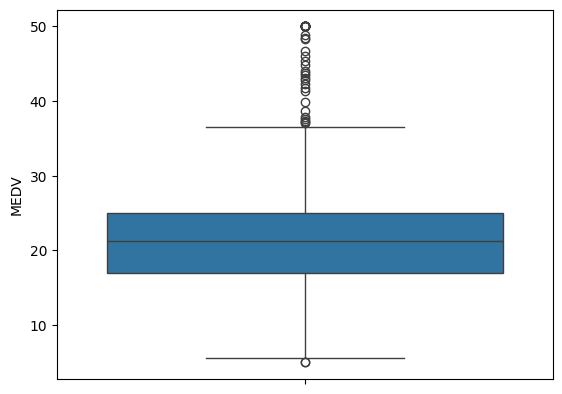

In [6]:
import seaborn as sns 

sns.boxplot(df['MEDV'])

In [7]:
def remove_outliers_iqr(df, target_column):
    Q1 = df[target_column].quantile(0.25)  # 25th percentile
    Q3 = df[target_column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Remove outliers
    df = df[(df[target_column] >= lower_bound) & (df[target_column] <= upper_bound)]
    return df

<Axes: ylabel='MEDV'>

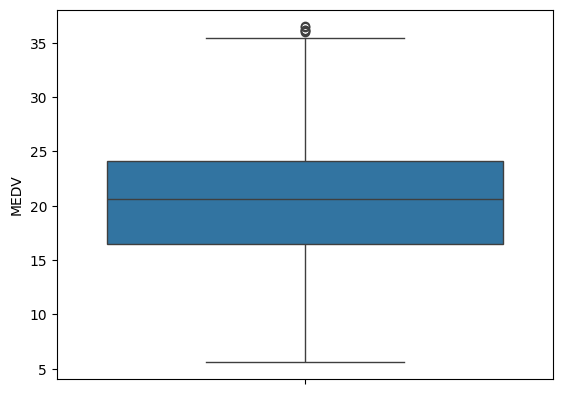

In [8]:
df=remove_outliers_iqr(df, 'MEDV')
sns.boxplot(df['MEDV'])

In [9]:
x=df.iloc[:,0:-1]
y=df['MEDV']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Define Deep Neural Network Model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train Model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test), verbose=1)



C:\Users\gayat\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 445.3649 - mae: 20.1663 - val_loss: 379.5477 - val_mae: 18.6337
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 381.2857 - mae: 18.6593 - val_loss: 278.2860 - val_mae: 15.8985
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 246.3913 - mae: 14.8811 - val_loss: 156.5072 - val_mae: 11.4852
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132.1753 - mae: 10.3374 - val_loss: 72.0079 - val_mae: 7.3968
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.9186 - mae: 6.5687 - val_loss: 42.4523 - val_mae: 5.5313
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.6818 - mae: 4.9082 - val_loss: 29.7514 - val_mae: 4.5576
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.3688 - mae: 4.0363 - val_loss: 23.0775 - val_mae: 3.9539
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2909 - mae: 3.6954 - val_loss: 19.3173 - val_mae: 3.5272
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━

In [18]:
#Evaluate Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


# Calculate R-squared (which can be interpreted as a measure of "goodness of fit")
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.1942 - mae: 1.6653
Test Loss: 5.22878885269165, Test MAE: 1.7609671354293823
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
R-squared: 0.869656516788506


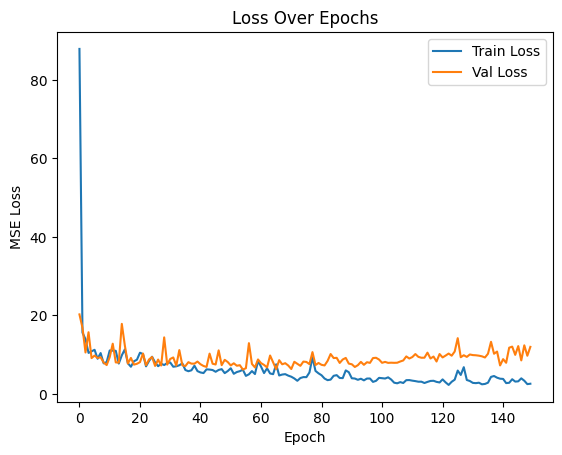

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [13]:
y_pred = y_pred.reshape(-1,)
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction':y_pred
    }
)

result

NameError: name 'y_pred' is not defined